In [5]:
# 此段数据读取代码无需掌握
import gzip

import numpy as np


def read_mnist(images_path, labels_path):
    with gzip.open("../6.第六章/MNIST/raw/" + labels_path, "rb") as labelsFile:
        y = np.frombuffer(labelsFile.read(), dtype=np.uint8, offset=8)

    with gzip.open("../6.第六章/MNIST/raw/" + images_path, "rb") as imagesFile:
        X = (
            np.frombuffer(imagesFile.read(), dtype=np.uint8, offset=16)
            .reshape(len(y), 784)
            .reshape(len(y), 28, 28, 1)
        )

    return X, y


train = {}
test = {}

train["X"], train["y"] = read_mnist(
    "train-images-idx3-ubyte.gz", "train-labels-idx1-ubyte.gz"
)
test["X"], test["y"] = read_mnist(
    "t10k-images-idx3-ubyte.gz", "t10k-labels-idx1-ubyte.gz"
)

train["X"].shape, train["y"].shape, test["X"].shape, test["y"].shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

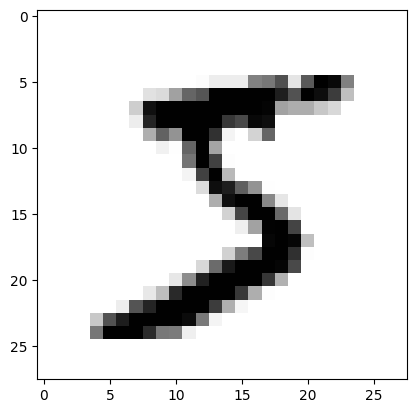

In [6]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.imshow(train["X"][0].reshape(28, 28), cmap=plt.cm.gray_r)

In [7]:
# 样本 padding 填充
X_train = np.pad(train["X"], ((0, 0), (2, 2), (2, 2), (0, 0)), "constant")
X_test = np.pad(test["X"], ((0, 0), (2, 2), (2, 2), (0, 0)), "constant")
# 标签独热编码
# 为什么要独热编码？最终是 Softmax 输出？
# 答：交叉熵损失函数，需要独热编码的标签进行计算
# 神经网络中使用 交叉熵损失函数 较多
y_train = np.eye(10)[train["y"].reshape(-1)]
y_test = np.eye(10)[test["y"].reshape(-1)]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 32, 32, 1), (10000, 32, 32, 1), (60000, 10), (10000, 10))

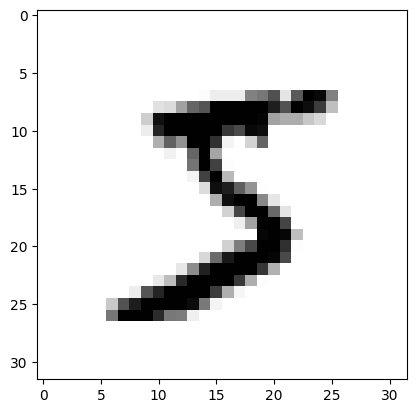

In [8]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.imshow(X_train[0].reshape(32, 32), cmap=plt.cm.gray_r)

In [9]:
# TensorFlow 高阶 tf.keras 构建

In [10]:
import tensorflow as tf

model = tf.keras.models.Sequential()  # 定义顺序模型

# 卷积层，6 个 5x5 卷积核，步长为 1，relu 激活，第一层需指定 input_shape
model.add(
    tf.keras.layers.Conv2D(
        input_shape=(32, 32, 1),
        filters=6,
        kernel_size=(5, 5),
        strides=(1, 1),
        activation="relu",
    )
)

# 平均池化，池化窗口默认为 2
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2))


# 卷积层，16 个 5x5 卷积核，步长为 1，relu 激活
model.add(
    tf.keras.layers.Conv2D(
        filters=16,
        kernel_size=(5, 5),
        strides=(1, 1),
        activation="relu",
    )
)

# 平均池化，池化窗口默认为 2
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2))

# 需展平后才能与全连接层相连
model.add(tf.keras.layers.Flatten())

# 全连接层，输出为 120，relu 激活
model.add(tf.keras.layers.Dense(units=120, activation="relu"))

# 全连接层，输出为 84，relu 激活
model.add(tf.keras.layers.Dense(units=84, activation="relu"))

# 全连接层，输出为 10，Softmax 激活
model.add(tf.keras.layers.Dense(units=10, activation="softmax"))

# 查看网络结构
model.summary()

C:\Users\91658\Miniconda3\envs\ml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# 编译模型，Adam 优化器，多分类交叉熵损失函数，准确度评估
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [21]:
# 模型训练及评估
model.fit(X_train, y_train, batch_size=64, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8772 - loss: 0.6281 - val_accuracy: 0.9764 - val_loss: 0.0750
Epoch 2/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9803 - loss: 0.0642 - val_accuracy: 0.9833 - val_loss: 0.0528


In [ ]:
# TensorFlow 低阶 tf.nn 构建

In [15]:
class Model(object):
    def __init__(self):
        self.conv_W1 = tf.Variable(tf.random.normal(shape=(5, 5, 1, 6)))
        self.conv_W2 = tf.Variable(tf.random.normal(shape=(5, 5, 6, 16)))

        self.fc_W1 = tf.Variable(tf.random.normal(shape=(5 * 5 * 16, 120)))
        self.fc_W2 = tf.Variable(tf.random.normal(shape=(120, 84)))
        self.out_W = tf.Variable(tf.random.normal(shape=(84, 10)))

        self.fc_b1 = tf.Variable(tf.zeros(120))
        self.fc_b2 = tf.Variable(tf.zeros(84))
        self.out_b = tf.Variable(tf.zeros(10))

    def __call__(self, x):
        x = tf.cast(x, tf.float32)  # 转换输入数据类型

        # 卷积层 1: Input = 32x32x1. Output = 28x28x6.
        #

        conv1 = tf.nn.conv2d(x, self.conv_W1, strides=[1, 1, 1, 1], padding="VALID")
        conv1_o = tf.nn.relu(conv1)

        # 池化层 1: Input = 28x28x6. Output = 14x14x6.
        
        # ksize=[1, 2, 2, 1]:意思是池化窗口的大小为 2x2
        # [batch, height, width, channels]。在这种情况下：
        # 1: 表示在 batch 维度上不进行池化，保持原大小。
        # 2: 表示在 height 维度上使用 2x2 的窗口。
        # 2: 表示在 width 维度上使用 2x2 的窗口。
        # 1: 表示在 channels 维度上不进行池化，保持原大小   channel: 最后一个维度

        # strides=[1, 2, 2, 1]:
        # [batch, height, width, channels]。在这种情况下：
        # 1: 表示在 batch 维度上步长为 1。
        # 2: 表示在 height 维度上步长为 2。
        # 2: 表示在 width 维度上步长为 2。
        # 1: 表示在 channels 维度上步长为 1。  channel: 最后一个维度
        # strides=[1, 2, 2, 1] 的意思是池化窗口在 height 和 width 维度上每次移动 2 个单位
        avg1_o = tf.nn.avg_pool(
            conv1_o, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID"
        )

        # 卷积层 2: Input = 14x14x6. Output = 10x10x16.
        conv2 = tf.nn.conv2d(
            avg1_o,
            self.conv_W2,
            strides=[1, 1, 1, 1],
            padding="VALID",
        )
        conv2_o = tf.nn.relu(conv2)

        # 池化层 2: Input = 10x10x16. Output = 5x5x16.
        avg2_o = tf.nn.avg_pool(
            conv2_o, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID"
        )

        # 展平. Input = 5x5x16. Output = 400.
        # -1 是拍平？1个维度？
        flatten = tf.reshape(avg2_o, [-1, 5 * 5 * 16])

        # 全连接层
        fc1 = tf.add(tf.matmul(flatten, self.fc_W1), self.fc_b1)
        fc1_o = tf.nn.relu(fc1)

        fc2 = tf.add(tf.matmul(fc1, self.fc_W2), self.fc_b2)
        fc2_o = tf.nn.relu(fc2)

        outs = tf.add(tf.matmul(fc2_o, self.out_W), self.out_b)
        return outs

In [16]:
def loss_fn(model, x, y):
    preds = model(x)
    return tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits=preds, labels=y)
    )

In [17]:
def accuracy_fn(logits, labels):
    preds = tf.argmax(logits, axis=1)  # 取值最大的索引，正好对应字符标签
    labels = tf.argmax(labels, axis=1)
    return tf.reduce_mean(tf.cast(tf.equal(preds, labels), tf.float32))

In [18]:
from sklearn.model_selection import KFold
from tqdm.notebook import tqdm

EPOCHS = 2  # 迭代此时
BATCH_SIZE = 64  # 每次迭代的批量大小
LEARNING_RATE = 0.001  # 学习率

model = Model()  # 实例化模型类

for epoch in range(EPOCHS):  # 设定全数据集迭代次数
    indices = np.arange(len(X_train))  # 生成训练数据长度规则序列
    np.random.shuffle(indices)  # 对索引序列进行打乱，保证为随机数据划分
    batch_num = int(len(X_train) / BATCH_SIZE)  # 根据批量大小求得要划分的 batch 数量
    kf = KFold(n_splits=batch_num)  # 将数据分割成 batch 数量份
    # KFold 划分打乱后的索引序列，然后依据序列序列从数据中抽取 batch 样本
    for _, index in tqdm(kf.split(indices), desc="Training"):
        X_batch = X_train[indices[index]]  # 按打乱后的序列取出数据
        y_batch = y_train[indices[index]]

        with tf.GradientTape() as tape:  # 追踪梯度
            loss = loss_fn(model, X_batch, y_batch)

        trainable_variables = [
            model.conv_W1,
            model.conv_W2,
            model.fc_W1,
            model.fc_W2,
            model.out_W,
            model.fc_b1,
            model.fc_b2,
            model.out_b,
        ]  # 需优化参数列表
        grads = tape.gradient(loss, trainable_variables)  # 计算梯度

        optimizer = tf.optimizers.Adam(learning_rate=LEARNING_RATE)  # Adam 优化器
        optimizer.apply_gradients(zip(grads, trainable_variables))  # 更新梯度

    # 每一次 Epoch 执行小批量测试，防止内存不足
    indices_test = np.arange(len(X_test))
    batch_num_test = int(len(X_test) / BATCH_SIZE)
    kf_test = KFold(n_splits=batch_num_test)
    test_acc = 0
    for _, index in tqdm(kf_test.split(indices_test), desc="Testing"):
        X_test_batch = X_test[indices_test[index]]
        y_test_batch = y_test[indices_test[index]]
        batch_acc = accuracy_fn(model(X_test_batch), y_test_batch)  # 计算准确度
        test_acc += batch_acc  # batch 准确度求和

    accuracy = test_acc / batch_num_test  # 测试集准确度
    print(f"Epoch [{epoch+1}/{EPOCHS}], Accuracy: [{accuracy:.2f}], Loss: [{loss:.4f}]")

Training: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

Epoch [1/2], Accuracy: [0.87], Loss: [19597.6719]


Training: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

Epoch [2/2], Accuracy: [0.91], Loss: [7475.4102]


In [ ]:
 # PyTorch 低阶 nn.Module 构建

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        # 卷积层 1
        self.conv1 = nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=(5, 5), stride=1
        )
        # 池化层 1
        self.pool1 = nn.AvgPool2d(kernel_size=(2, 2))
        # 卷积层 2
        self.conv2 = nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=(5, 5), stride=1
        )
        # 池化层 2
        self.pool2 = nn.AvgPool2d(kernel_size=(2, 2))
        # 全连接层
        self.fc1 = nn.Linear(in_features=5 * 5 * 16, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.reshape(-1, 5 * 5 * 16)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)
        return x

In [ ]:
model = LeNet()
model

In [ ]:
model(torch.Tensor(X_train[0]).reshape(-1, 1, 32, 32))

In [ ]:
import torch.utils.data

# 依次传入样本和标签张量，制作训练数据集和测试数据集
train_data = torch.utils.data.TensorDataset(
    torch.Tensor(X_train), torch.Tensor(train["y"])
)
test_data = torch.utils.data.TensorDataset(
    torch.Tensor(X_test), torch.Tensor(test["y"])
)

train_data, test_data

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

train_loader, test_loader

In [ ]:
loss_fn = nn.CrossEntropyLoss()  # 交叉熵损失函数
opt = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam 优化器

In [ ]:
def fit(epochs, model, opt):
    # 全数据集迭代 epochs 次
    print("================ Start Training =================")
    for epoch in range(epochs):
        # 从数据加载器中读取 Batch 数据开始训练
        for i, (images, labels) in enumerate(train_loader):
            images = images.reshape(-1, 1, 32, 32)  # 对特征数据展平，变成 784
            labels = labels.type(torch.LongTensor)  # 真实标签

            outputs = model(images)  # 前向传播
            loss = loss_fn(outputs, labels)  # 传入模型输出和真实标签

            opt.zero_grad()  # 优化器梯度清零，否则会累计
            loss.backward()  # 从最后 loss 开始反向传播
            opt.step()  # 优化器迭代

            # 自定义训练输出样式
            if (i + 1) % 100 == 0:
                print(
                    "Epoch [{}/{}], Batch [{}/{}], Train loss: [{:.3f}]".format(
                        epoch + 1, epochs, i + 1, len(train_loader), loss.item()
                    )
                )

        # 每个 Epoch 执行一次测试
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, 1, 32, 32)
            labels = labels.type(torch.LongTensor)

            outputs = model(images)
            # 得到输出最大值 _ 及其索引 predicted
            _, predicted = torch.max(outputs.data, 1)

            correct += (predicted == labels).sum().item()  # 如果预测结果和真实值相等则计数 +1
            total += labels.size(0)  # 总测试样本数据计数

        print(
            "============= Test accuracy: {:.3f} ==============".format(correct / total)
        )

In [ ]:
fit(epochs=2, model=model, opt=opt)


In [ ]:
# PyTorch 高阶 nn.Sequential 构建

In [ ]:
class Flatten(nn.Module):
    def forward(self, input):
        return input.reshape(input.size(0), -1)


# 构建 Sequential 容器结构
model_s = nn.Sequential(
    nn.Conv2d(1, 6, (5, 5), 1),
    nn.ReLU(),
    nn.AvgPool2d((2, 2)),
    nn.Conv2d(6, 16, (5, 5), 1),
    nn.ReLU(),
    nn.AvgPool2d((2, 2)),
    Flatten(),
    nn.Linear(5 * 5 * 16, 120),
    nn.ReLU(),
    nn.Linear(120, 84),
    nn.ReLU(),
    nn.Linear(84, 10),
    nn.Softmax(dim=1),
)

model_s

In [ ]:
opt_s = torch.optim.Adam(model_s.parameters(), lr=0.001)  # Adam 优化器
fit(epochs=2, model=model_s, opt=opt_s)